In [1]:
#pyber
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd


In [2]:
city_data_df = pd.read_csv("raw_data/city_data.csv")
ride_data_df = pd.read_csv("raw_data/ride_data.csv")
combined_data_df = pd.merge(city_data_df, ride_data_df, on="city", how='outer')
combined_data_table = combined_data_df[['city','date','fare','ride_id','driver_count','type']]
combined_data_table.sort_values('city')


,city,date,fare,ride_id,driver_count,type
1594,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
1595,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
1624,Alvarezhaven,2016-07-04 04:28:22,33.31,306054352684,21,Urban
1623,Alvarezhaven,2016-01-27 10:38:40,6.72,6152998520191,21,Urban
1622,Alvarezhaven,2016-05-16 15:33:14,6.45,8939751998750,21,Urban
1620,Alvarezhaven,2016-03-16 02:01:15,33.62,8974645194719,21,Urban
1619,Alvarezhaven,2016-06-16 18:29:05,32.46,858631473935,21,Urban
1618,Alvarezhaven,2016-02-15 11:14:12,31.74,5487020911007,21,Urban
1617,Alvarezhaven,2016-11-19 02:00:34,5.34,1108172306544,21,Urban
1616,Alvarezhaven,2016-01-25 06:02:25,5.16,2233026076010,21,Urban


In [3]:
cityGroupBy_df = combined_data_df.groupby(["city","type"])
cityData = cityGroupBy_df.sum()
avgFarePrice = round(cityGroupBy_df['fare'].mean(),2)
riderCount = cityGroupBy_df['ride_id'].count()
totalDrivers = pd.to_numeric(cityData['driver_count']/riderCount,downcast='signed')


pyber_analysis = pd.DataFrame({
                                       "Average Fare ($) Per City" : avgFarePrice,
                                       "Total Number of Drivers per city" : totalDrivers,
                                       "Total Number of Rides per city": riderCount
                                        })
pyber_summary_analysis = pyber_analysis[["Average Fare ($) Per City","Total Number of Drivers per city","Total Number of Rides per city"]]

pyber_summary_analysis_resetted = pyber_summary_analysis.reset_index()
pyber_summary_analysis_resetted = pyber_summary_analysis_resetted.rename(columns={'type':'City Type'})
pyber_summary_analysis_resetted = pyber_summary_analysis_resetted.set_index('city') 
pyber_summary_analysis_resetted

,City Type,Average Fare ($) Per City,Total Number of Drivers per city,Total Number of Rides per city
city,,,,
Alvarezhaven,Urban,23.93,21,31
Alyssaberg,Urban,20.61,67,26
Anitamouth,Suburban,37.32,16,9
Antoniomouth,Urban,23.62,21,22
Aprilchester,Urban,21.98,49,19
Arnoldview,Urban,25.11,41,31
Campbellport,Suburban,33.71,26,15
Carrollbury,Suburban,36.61,4,10
Carrollfort,Urban,25.40,55,29


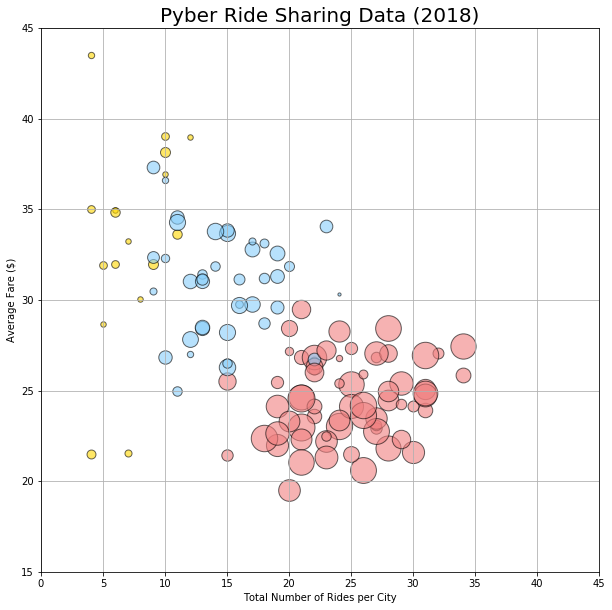

In [4]:
#pyber_summary_analysis_bubble_chart
    
colors = {'Rural': 'gold', 'Suburban': 'lightskyblue', 'Urban': 'lightcoral'}
plt.figure(figsize=(10,10))   

color_region = list()
 
for i, r in pyber_summary_analysis_resetted.iterrows():
    plt.scatter(x = r['Total Number of Rides per city'],
            y = r['Average Fare ($) Per City'],
            s = r['Total Number of Drivers per city']*10,
            marker='o',
            facecolors=colors.get(r['City Type']),
            edgecolors='black',
            alpha = .6,
            linewidths = 1,
            label = r['City Type']
            )
plt.title('Pyber Ride Sharing Data (2018)', fontsize=20)
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')
plt.xlim(0,45)
plt.ylim(15,45)
plt.grid()
plt.show()



In [5]:
df_citytype = combined_data_df.groupby(["type"])

city_summary_table = pd.DataFrame({
                           "Total Fares by City Type": df_citytype["fare"].sum()
})
city_summary_table

,Total Fares by City Type
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


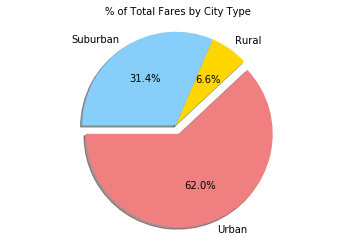

In [6]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
values = [40078.34, 4255.09, 20335.69]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Total Fares by City Type', fontsize=10)
plt.axis("equal")
plt.show()
#ride_id.count

In [7]:
df_ridetype = combined_data_df.groupby(["type"])

rider_summary_table = pd.DataFrame({
                           "Total Rides by City Type": df_citytype["ride_id"].count()
})

rider_summary_table

,Total Rides by City Type
type,
Rural,125
Suburban,657
Urban,1625


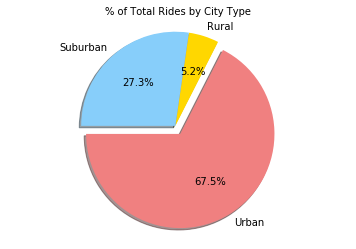

In [8]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
values = [1625, 125, 657]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Total Rides by City Type', fontsize=10)
plt.axis("equal")
plt.show()
#ride_id.count

In [11]:
driverbycity_df = pyber_analysis.groupby(["type"]).sum()

driver_summary_table = pd.DataFrame({
                           "Total Drivers by City Type": driverbycity_df["Total Number of Drivers per city"]
})
driver_summary_table


,Total Drivers by City Type
type,
Rural,104.0
Suburban,629.0
Urban,2607.0


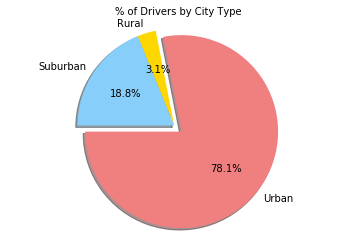

In [10]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
values = [2607, 104, 629]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Drivers by City Type', fontsize=10)
plt.axis("equal")
plt.show()